In [1]:
from annoy import AnnoyIndex
import pandas as pd
import numpy as np
import cv2
import sys  
sys.path.insert(0, '../')
import matplotlib.pyplot as plt
from bot.utils.color_extractor import ColorFeaturesExtractor, Mode
from bot.utils.BOVW_extractor import BOVWFeaturesExtractor
from bot.utils.hog_extractor import HogFeaturesExtractor
from bot.utils.retriever import Retriever
from bot.utils.utils import get_names_from_indexes
import tensorflow as tf
from skimage.io import imread
import pickle

# Create indexes

In [2]:
def create_index(features_path, index_dir_path, retrieval_mode, metric):
    # read features
    df_features = pd.read_csv(features_path, sep=',', header=None)
    # instantiate retriever
    retriever = Retriever(index_dir_path)
    # create index
    retriever.create_index(df_features, retrieval_mode=retrieval_mode, metric = metric)
#     return df_features

In [3]:
# neural network features
create_index('../data/nn_features.csv', '../indexes/', 'neural_network', 'euclidean')

In [4]:
# neural network features pc
create_index('../data/nn_features_pca.csv', '../indexes/', 'neural_network_pca', 'euclidean')

In [5]:
# color features
create_index('../data/color_features.csv', '../indexes/', 'color', 'euclidean')

In [6]:
# color features pca
create_index('../data/color_features_pca.csv', '../indexes/', 'color_pca', 'euclidean')

In [7]:
# color features center subregions
create_index('../data/color_features_center_subregions.csv', '../indexes/', 'color_center_subregions', 'euclidean')

In [8]:
# color features center subregions pca
create_index('../data/color_features_center_subregions_pca.csv', '../indexes/', 'color_center_subregions_pca', 'euclidean')

In [9]:
# # BOVW features
# create_index('../data/BOVW_features.csv', '../indexes/', 'bovw', 'euclidean')

In [10]:
# # BOVW features pca
# create_index('../data/BOVW_features_pca.csv', '../indexes/', 'bovw_pca', 'euclidean')

In [11]:
# HOG features
create_index('../data/hog_features.csv', '../indexes/', 'hog', 'euclidean')

In [12]:
# HOG features pca
create_index('../data/hog_features_pca.csv', '../indexes/', 'hog_pca', 'euclidean')

In [13]:
# # color + HOG features
# create_index('../data/merged_color_hog_features.csv', '../indexes/', 'color_hog', 'euclidean')

In [14]:
# color + HOG features with pca
create_index('../data/hog_color_features_pca.csv', '../indexes/', 'hog_color_pca', 'euclidean')

In [15]:
# # color + HOG features with pca and standardization
# create_index('../data/merged_color_hog_pca_std.csv', '../indexes/', 'color_hog_pca_std', 'euclidean')

# Test retrieval

In [2]:
# utils
def show_images(idx, names_df, img_path):
    # plot starting image
    img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.imshow(img_rgb)
    plt.show()
    # extract names
    names = names_df.loc[idx,'name'].values
    # prepare plot
    n_elements = len(names)
    fig, ax = plt.subplots(1,n_elements,figsize=(12,6))
    for i in range(0,n_elements):
        tmp = cv2.imread('../data/train/' + names[i])
        tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
        ax[i].imshow(tmp)
    plt.show()
    return names

def loadimg(img_path):

    im = tf.keras.preprocessing.image.load_img(
        img_path,
        target_size=(300, 300, 3)
    )
    imarr = tf.keras.preprocessing.image.img_to_array(im)
    imarr = tf.keras.applications.efficientnet.preprocess_input(imarr)
    return np.array([imarr])




In [3]:
# instantiate retriever
retriever = Retriever('../indexes/', load_all=True)
# choose image
img_path = '../test_imgs/yellow.jpg'
# settings
n_neighbours = 10

loading neural_network ...
loading neural_network_pca ...
loading color ...
loading color_pca ...
loading color_center_subregions ...
loading color_center_subregions_pca ...
loading hog ...
loading hog_pca ...
loading hog_color_pca ...


## Neural network

In [4]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [5]:
# read model
model = tf.keras.models.load_model('../data/model.h5')

In [6]:
# NN
img_features_nn = model.predict(loadimg(img_path))[1][0]

In [7]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn, retrieval_mode='neural_network', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [8]:
distances

[6.381861686706543,
 6.421413898468018,
 6.440969944000244,
 6.532479286193848,
 6.5797343254089355,
 6.5797343254089355,
 6.616982936859131,
 6.674434185028076,
 6.8015828132629395,
 7.111202716827393]

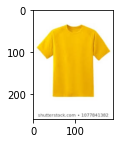

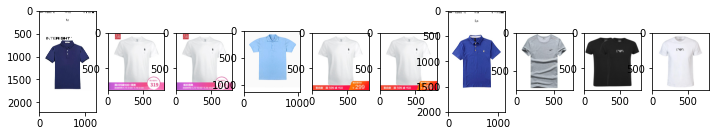

array(['5689.jpg', '5527.jpg', '5525.jpg', '494.jpg', '5522.jpg',
       '5523.jpg', '6506.jpg', '8279.jpg', '6154.jpg', '2529.jpg'],
      dtype=object)

In [9]:
# show retrieval results
show_images(indexes, df_names, img_path)


## Neural network PCA

In [10]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [11]:
# read model
model = tf.keras.models.load_model('../data/model.h5')

In [12]:
# NN
img_features_nn = model.predict(loadimg(img_path))[1][0]
# read pca model
with open('../data/pca_nn.pckl', 'rb') as handle:
                    pca_nn = pickle.load(handle)
# apply pca
img_features_nn_pca = pca_nn.transform([img_features_nn])[0]

In [13]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn_pca, retrieval_mode='neural_network_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [14]:
distances

[3.5666122436523438,
 3.6363978385925293,
 3.691918134689331,
 3.7044570446014404,
 3.7240707874298096,
 3.8592543601989746,
 3.917367696762085,
 3.950810670852661,
 3.950810670852661,
 4.067331314086914]

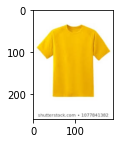

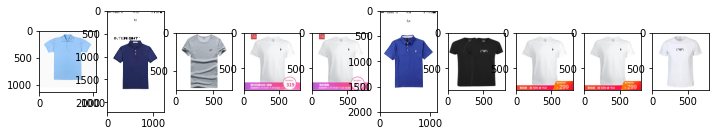

array(['494.jpg', '5689.jpg', '8279.jpg', '5527.jpg', '5525.jpg',
       '6506.jpg', '6154.jpg', '5522.jpg', '5523.jpg', '2529.jpg'],
      dtype=object)

In [15]:
# show retrieval results
show_images(indexes, df_names, img_path)


## Color

In [16]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [17]:
# color extractor
features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_ONLY)

In [18]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color, retrieval_mode='color', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [19]:
distances

[0.5812748670578003,
 0.946540892124176,
 0.9627994298934937,
 1.2216166257858276,
 1.2562142610549927,
 1.2911573648452759,
 1.3210171461105347,
 1.3274997472763062,
 1.339784860610962,
 1.339784860610962]

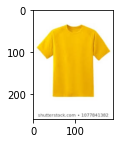

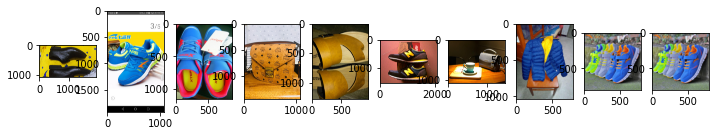

array(['23513.jpg', '18521.jpg', '23176.jpg', '31319.jpg', '20035.jpg',
       '22506.jpg', '29710.jpg', '2115.jpg', '17965.jpg', '26483.jpg'],
      dtype=object)

In [20]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color PCA

In [21]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [22]:
# color extractor
features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_ONLY)
# read pca model
with open('../data/pca_color.pckl', 'rb') as handle:
                    pca_color = pickle.load(handle)
# apply pca
img_features_color_pca = pca_color.transform([img_features_color])[0]

In [23]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color_pca, retrieval_mode='color_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [24]:
distances

[0.03465300053358078,
 0.03522013500332832,
 0.03595113381743431,
 0.03600512444972992,
 0.036017563194036484,
 0.03620371222496033,
 0.036439038813114166,
 0.03692252188920975,
 0.03716675192117691,
 0.03746666759252548]

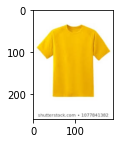

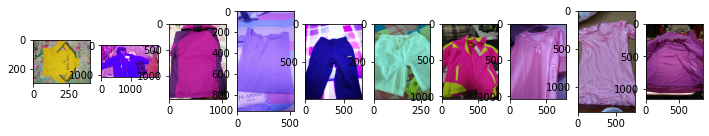

array(['4737.jpg', '2266.jpg', '4125.jpg', '2795.jpg', '9313.jpg',
       '7837.jpg', '600.jpg', '4869.jpg', '4877.jpg', '4133.jpg'],
      dtype=object)

In [25]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color center subregions

In [26]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [27]:
# color extractor
features_extractor = ColorFeaturesExtractor((16, 18, 2), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_SUBREGIONS)

In [28]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color, retrieval_mode='color_center_subregions', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [29]:
distances

[1.8337968587875366,
 1.8806486129760742,
 2.10811710357666,
 2.3330821990966797,
 2.359524726867676,
 2.4391233921051025,
 2.4454755783081055,
 2.5114285945892334,
 2.530254364013672,
 2.534935235977173]

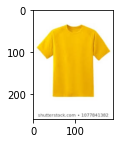

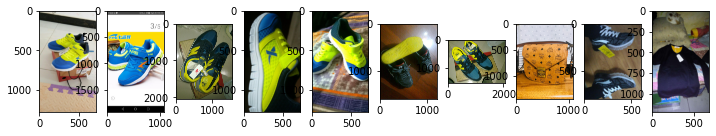

array(['25977.jpg', '18521.jpg', '22499.jpg', '16580.jpg', '26403.jpg',
       '22395.jpg', '22501.jpg', '31319.jpg', '19064.jpg', '3498.jpg'],
      dtype=object)

In [30]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color center subregions PCA

In [31]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [32]:
# color extractor
features_extractor = ColorFeaturesExtractor((16, 18, 2), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_SUBREGIONS)
# read pca model
with open('../data/pca_color_center_subregions.pckl', 'rb') as handle:
                    pca_color_center_subregions = pickle.load(handle)
# apply pca
img_features_color_pca = pca_color_center_subregions.transform([img_features_color])[0]

In [33]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color_pca, retrieval_mode='color_center_subregions_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [34]:
distances

[0.07601344585418701,
 0.07907889783382416,
 0.07976097613573074,
 0.07986300438642502,
 0.08122138679027557,
 0.08439904451370239,
 0.0861089900135994,
 0.09255441278219223,
 0.0974578782916069,
 0.09844113886356354]

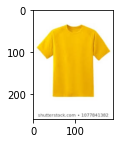

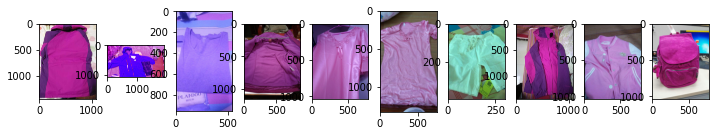

array(['4125.jpg', '2266.jpg', '2795.jpg', '4133.jpg', '4869.jpg',
       '4877.jpg', '7837.jpg', '4127.jpg', '5814.jpg', '31966.jpg'],
      dtype=object)

In [35]:
# show retrieval results
show_images(indexes, df_names, img_path)

## HOG

In [36]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [37]:
# HOG extractor
features_extractor = HogFeaturesExtractor()
img_features_hog = features_extractor.extract(imread(img_path))

In [38]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_hog, retrieval_mode='hog', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [39]:
distances

[7.939614295959473,
 8.649432182312012,
 8.919713973999023,
 9.024627685546875,
 9.024887084960938,
 9.092055320739746,
 9.130453109741211,
 9.130453109741211,
 9.151568412780762,
 9.151725769042969]

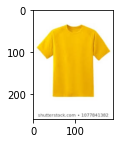

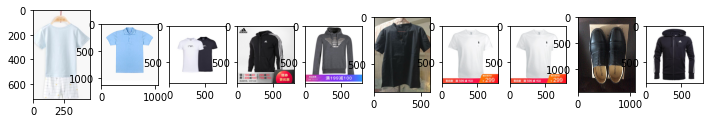

array(['4154.jpg', '494.jpg', '2715.jpg', '2955.jpg', '12.jpg',
       '7386.jpg', '5522.jpg', '5523.jpg', '27028.jpg', '2960.jpg'],
      dtype=object)

In [40]:
# show retrieval results
show_images(indexes, df_names, img_path)

## HOG PCA

In [41]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/rpo.jpg'

In [42]:
# HOG extractor
features_extractor = HogFeaturesExtractor()
img_features_hog = features_extractor.extract(imread(img_path))
# read pca model
with open('../data/pca_hog.pckl', 'rb') as handle:
                    pca_hog = pickle.load(handle)
# apply pca
img_features_hog_pca = pca_hog.transform([img_features_hog])[0]

In [43]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_hog_pca, retrieval_mode='hog_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [44]:
distances

[5.646453857421875,
 6.190478801727295,
 6.554056167602539,
 6.63109016418457,
 6.646095275878906,
 6.711987018585205,
 6.711987018585205,
 6.8062567710876465,
 6.8062567710876465,
 6.8062567710876465]

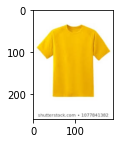

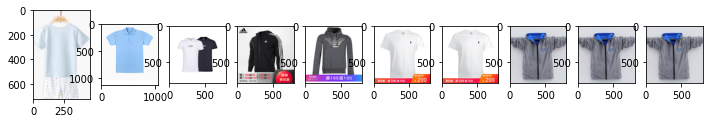

array(['4154.jpg', '494.jpg', '2715.jpg', '2955.jpg', '12.jpg',
       '5522.jpg', '5523.jpg', '378.jpg', '2856.jpg', '6630.jpg'],
      dtype=object)

In [45]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color + HOG pca

In [46]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/rpo.jpg'

In [47]:
# extractors
hog_features_extractor = HogFeaturesExtractor()
color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# extract features
img_features_hog = hog_features_extractor.extract(imread(img_path))
img_features_color = color_features_extractor.extract(cv2.imread(img_path), Mode.CENTER_ONLY)
# read pca models
with open('../data/pca_hc_hog.pckl', 'rb') as handle:
                    pca_hc_hog = pickle.load(handle)
with open('../data/pca_hc_color.pckl', 'rb') as handle:
                    pca_hc_color = pickle.load(handle)
# apply pca
img_features_hog_pca = pca_hc_hog.transform([img_features_hog])[0]
img_features_color_pca = pca_hc_color.transform([img_features_color])[0]
# merge features
img_features_merged_pca = np.hstack([img_features_hog_pca, img_features_color_pca])

In [48]:
img_features_merged_pca.shape

(300,)

In [49]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_merged_pca, retrieval_mode='hog_color_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [50]:
distances

[5.037109375,
 5.4053850173950195,
 5.436424732208252,
 5.541419506072998,
 5.670889377593994,
 5.722209453582764,
 5.730689525604248,
 5.75558614730835,
 5.759020805358887,
 5.771780014038086]

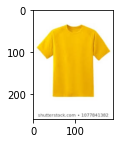

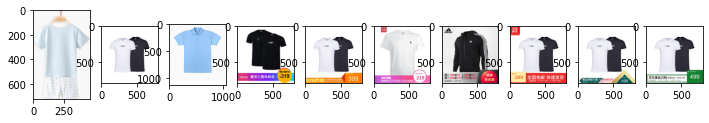

array(['4154.jpg', '2715.jpg', '494.jpg', '2221.jpg', '2718.jpg',
       '5525.jpg', '2955.jpg', '2716.jpg', '250.jpg', '2720.jpg'],
      dtype=object)

In [51]:
# show retrieval results
show_images(indexes, df_names, img_path)

# Test delete

In [52]:
# test delete index
retriever.delete_index('replace_value')

## Color + HOG (OLD)

In [53]:
# # read images names
# df_names = pd.read_csv('../data/retrieval_base.csv')
# # choose img
# img_path = '../test_imgs/tshirt.jpg'

In [54]:
# # extractors
# hog_features_extractor = HogFeaturesExtractor()
# color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# # extract features
# img_features_hog = hog_features_extractor.extract(imread(img_path))
# img_features_color = color_features_extractor.extract(cv2.imread(img_path), center_only=True)
# # merge features
# img_features_merged = np.concatenate((img_features_hog, img_features_color))

In [55]:
# # retrieve images
# (indexes, distances) = retriever.retrieve(img_features_merged, retrieval_mode='color_hog', n_neighbours=5, include_distances=True)

In [56]:
# distances

In [57]:
# # show retrieval results
# show_images(indexes, df_names)

## Color + HOG pca and standardization (OLD)

In [58]:
# # read images names
# df_names = pd.read_csv('../data/retrieval_base.csv')
# # choose img
# img_path = '../test_imgs/rpo.jpg'
# img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)

In [59]:
# # extractors
# hog_features_extractor = HogFeaturesExtractor()
# color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# # extract features
# img_features_hog = hog_features_extractor.extract(imread(img_path))
# img_features_color = color_features_extractor.extract(cv2.imread(img_path), center_only=True)
# # merge features
# img_features_merged = np.concatenate((img_features_hog, img_features_color))
# # read and apply scaler
# with open('../data/scaler_std.pckl', 'rb') as handle:
#                     scaler = pickle.load(handle)
# img_features_merged = scaler.transform([img_features_merged])
# # read and apply pca model
# with open('../data/pca_std.pckl', 'rb') as handle:
#                     pca = pickle.load(handle)
# # apply pca
# img_features_merged_pca = pca.transform(img_features_merged)[0]

In [60]:
# img_features_merged_pca.shape

In [61]:
# # retrieve images
# (indexes, distances) = retriever.retrieve(img_features_merged_pca, retrieval_mode='color_hog_pca_std', n_neighbours=5, include_distances=True)

In [62]:
distances

[5.037109375,
 5.4053850173950195,
 5.436424732208252,
 5.541419506072998,
 5.670889377593994,
 5.722209453582764,
 5.730689525604248,
 5.75558614730835,
 5.759020805358887,
 5.771780014038086]

In [63]:
# # show retrieval results
# show_images(indexes, df_names)

## BOVW (OLD)

In [64]:
# # read images names
# df_names = pd.read_csv('../data/retrieval_base.csv')
# # choose img
# img_path = '../test_imgs/tshirt.jpg'
# img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)

In [65]:
# # BOVW extractor
# features_extractor = BOVWFeaturesExtractor('../data/')
# img_features_bovw = features_extractor.extract(cv2.imread(img_path))

In [66]:
# # retrieve images
# (indexes, distances) = retriever.retrieve(img_features_bovw, retrieval_mode='bovw', n_neighbours=5, include_distances=True)

In [67]:
# distances

In [68]:
# # show retrieval results
# show_images(indexes, df_names)